Accuracy: 0.25

User Text:  I am Very Happy Today

Predicted Emotion: joy


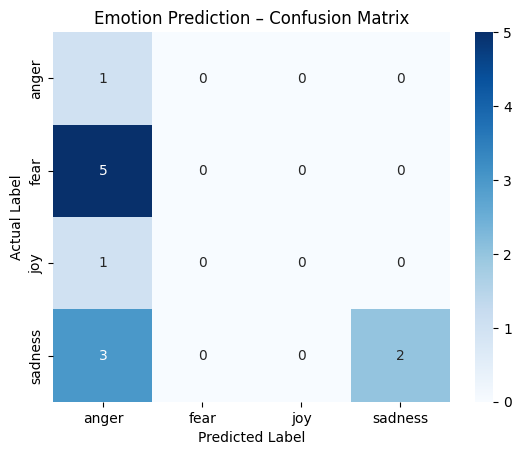

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

df=pd.read_csv("emotion_data.csv")

x=df["text"]
y=df["emotion"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

tfidf=TfidfVectorizer(stop_words="english",max_features=1000)
x_train_tfidf=tfidf.fit_transform(x_train)
x_test_tfidf=tfidf.transform(x_test)

model=LogisticRegression(max_iter=1000)
model.fit(x_train_tfidf,y_train)

y_pred=model.predict(x_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 2))

user_text=input("Enter a Sentence: ")
user_tfidf=tfidf.transform([user_text])
predicted_emotion=model.predict(user_tfidf)[0]

print("\nUser Text: ",user_text)
print("\nPredicted Emotion:", predicted_emotion)

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure()
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=model.classes_,
    yticklabels=model.classes_
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Emotion Prediction – Confusion Matrix")
plt.show()
